In [ ]:
import tensorflow as tf
import numpy as np

x = tf.ones(shape=(2,1))
y = np.ones(shape=(2,1))

x_zero = tf.zeros(shape=(2,1))
y_zero = np.zeros(shape=(2,1))

print(x), print("\n")
print(y), print("\n")
print(x_zero), print("\n")
print(y_zero), print("\n")
print(y_zero.ndim), print( y_zero.shape), print(y_zero.dtype) #Le 3 caratteristiche che formano un tensore (rank,shape e tipo)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


[[1.]
 [1.]]


tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


[[0.]
 [0.]]


2
(2, 1)
float64


(None, None, None)

In [ ]:
import tensorflow as tf
import numpy as np

x = tf.random.normal(shape=(3,1))
y = np.random.normal(size=(3,1))
print(x)
print("\n")
print(y)

tf.Tensor(
[[-0.73930216]
 [ 1.2691568 ]
 [-1.0113922 ]], shape=(3, 1), dtype=float32)


[[ 0.94047739]
 [ 0.16630617]
 [-0.73510732]]


**Quindi qual'è la differenza tra Numpy e Tensorflow?**

Una delle differenza principali è che i **tensori in tensorflow sono delle costanti**, **non possono essere modificati** una volta che sono stati istanziati, mentre in **numpy** è il contrario; **i tensori possono essere modificati** (es: tramite assegnamento) **anche dopo che sono stati istanziati.**

Proviamo a creare lo stesso tensore sia in tensorflow che in numpy e a modificarlo successivamente:

In [ ]:
import tensorflow as tf
import numpy as np

x_tf = tf.zeros(shape=(2,2))
x_np = np.zeros(shape=(2,2))

print(x_tf), print("\t"), print(x_np), print("\t")
#Quindi abbiamo due tensori 2,2 -> 2 righe e 2 colonne
#Proviamo a modificare lo 0 nella prima riga e 1 colonna (in alto a sinistra) in entrambi i tensori:

x_np[0,0] = 1
print(x_np) #Adesso nella posizione 0,0 ci sarà 1 anzichè 0, proviamo a fare lo stesso con tensorflow

x_tf[0,0] = 1 #ERRORE -> TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
	
[[0. 0.]
 [0. 0.]]
	
[[1. 0.]
 [0. 0.]]


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

**Quindi come si può modificare un tensore creato tramite tensorflow?** Visto che durante la fase di training dei nostri modelli, **la backpropagation dovrà modificare i pesi (che sono dei tensori).**

In questo caso entrano in gioco le **variables** di Tensorflow,che permette di fare modifiche tramite il metodo **assign()**

In [ ]:
import tensorflow as tf

x_tf = tf.Variable(initial_value=tf.zeros(shape=(2,2)))

print(x_tf),print("\n")

x_tf[0,0].assign(1)
print(x_tf), print("\n")

x_tf.assign(tf.ones(shape=(2,2)))
print(x_tf), print("\n")

x_tf.assign_add(tf.ones(shape=(2,2)))
print(x_tf)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>


<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 0.],
       [0., 0.]], dtype=float32)>


<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>


<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>


Un'altra differenza (in questo caso a "favore" di tensorflow) è che **tensorflow permette di calcolare il gradiente** di una qualsiasi funzione differenziabile.

Proviamo a farlo su un sample di esempio

In [ ]:
import tensorflow as tf

label = tf.Variable(initial_value=3.) #simuliamo una label: valore esatto
with tf.GradientTape() as tape:
  predict = tf.square(label) #simuliamo un valore predetto dal mdello

gradient = tape.gradient(predict, label) #Calcoliamo il gradiente considerando i due tensori

print(gradient)

label = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(label)
  predict = tf.square(label)

gradient = tape.gradient(predict,label)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


Ok adesso che abbiamo capito come definire dei tensori e delle variabili, capito come effettuare operazioni matematiche tra i tensori e infine come calcolare il gradiente, **possiamo implementare un qualsiasi modello di Machine Learning che si basa sul calcolo del gradiente.**

Proverò ad implementare uno dei modelli di ML più semplici utilizzando le basi appena apprese: **classificatore binario**. Per semplicità il classificatore verrà allenato su **dei dati sintetici linearmente separabili.**

In questo caso **i dati sintetici avranno la stessa matrice di covarianza, cosi da avere la stessa forma, ma differente media, in modo da avere differenti posizioni.**

In [ ]:
import numpy as np

num_samples_per_class = 1000
positive_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5], [0.5,1]],
    size = num_samples_per_class
)

negative_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

print(positive_samples), print(positive_samples.shape), print("\n")
print(negative_samples)

[[-1.18549312  1.86696623]
 [-0.27530777  1.95734491]
 [ 0.30042661  3.42028409]
 ...
 [ 0.00494726  2.72402854]
 [ 0.35045858  2.08105003]
 [ 1.80000048  3.89954669]]
(1000, 2)


[[ 1.12938388  0.12608078]
 [ 4.58873459  0.77118856]
 [ 1.84466989 -1.26692681]
 ...
 [ 2.71163538  0.28965822]
 [ 4.11531985  0.42122978]
 [ 3.56345785 -0.25475232]]


In [ ]:
inputs = np.vstack((positive_samples,negative_samples)).astype(np.float32)
print(inputs), print(inputs.shape)

[[-1.1854931   1.8669662 ]
 [-0.27530777  1.9573449 ]
 [ 0.3004266   3.420284  ]
 ...
 [ 2.7116354   0.28965822]
 [ 4.1153197   0.42122978]
 [ 3.563458   -0.2547523 ]]
(2000, 2)


(None, None)

In [ ]:
labels = np.vstack((
    np.ones(shape=(num_samples_per_class,1), dtype="float32"),
    np.zeros(shape=(num_samples_per_class,1), dtype="float32")
))

print(labels), print(labels.shape)

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
(2000, 1)


(None, None)

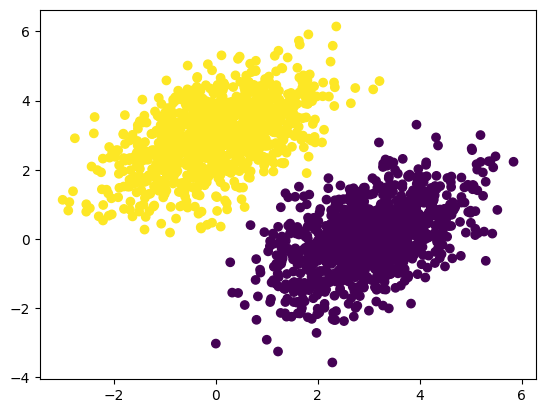

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0], inputs[:,1], c=labels[:,0])
plt.show()

Una volta definiti i dati di input dobbiamo definire gli elementi necessari per la predizione del classificatore. Il classificatore, una volta preso un sample in input, per assegnargli una classe effettuerà tale calcolo:

**Prediction = W * input + b**

Dobbiamo definire W, che rappresenta il vettore dei pesim che inizialmente verrano inizializzati in maniera randomica, per poi, durante la fase di training, essere modificati per diminuire la loss del modello.
Inoltre, dobbiamo definire b, che è il termine di bias (scalare).

In [ ]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim)))

print(W), print(W.shape), print("\n")
print(b), print(b.shape)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.6076995 ],
       [0.24444175]], dtype=float32)>
(2, 1)


<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>
(1,)


(None, None)

**Definiamo la funzione che effettua il calcolo della prediction e che calcola l'errore rispetto alla label originale.**

In [ ]:
def model(inputs):
  return tf.matmul(inputs,W) + b

def square_loss(targets,predicts):
  loss = tf.square(targets - predicts)
  return tf.reduce_mean(loss)

**Adesso bisogna allenare il classificatore.**

In [ ]:
learning_rate = 0.1

def training_step(inputs,targets):
  with tf.GradientTape() as tape:
    predictions = model(input)
    loss = square_loss(labels,predictions)

  grad_loss_W, grad_loss_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_W * learning_rate)
  b.assign_sub(grad_loss_b * learning_rate)
  return loss

In [ ]:
for step in range(40):
  loss = training_step(inputs, labels)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.2519
Loss at step 1: 0.2333
Loss at step 2: 0.1223
Loss at step 3: 0.1038
Loss at step 4: 0.0958
Loss at step 5: 0.0895
Loss at step 6: 0.0838
Loss at step 7: 0.0787
Loss at step 8: 0.0739
Loss at step 9: 0.0696
Loss at step 10: 0.0657
Loss at step 11: 0.0621
Loss at step 12: 0.0588
Loss at step 13: 0.0558
Loss at step 14: 0.0530
Loss at step 15: 0.0505
Loss at step 16: 0.0482
Loss at step 17: 0.0461
Loss at step 18: 0.0442
Loss at step 19: 0.0425
Loss at step 20: 0.0409
Loss at step 21: 0.0394
Loss at step 22: 0.0381
Loss at step 23: 0.0369
Loss at step 24: 0.0357
Loss at step 25: 0.0347
Loss at step 26: 0.0338
Loss at step 27: 0.0329
Loss at step 28: 0.0322
Loss at step 29: 0.0315
Loss at step 30: 0.0308
Loss at step 31: 0.0302
Loss at step 32: 0.0297
Loss at step 33: 0.0292
Loss at step 34: 0.0287
Loss at step 35: 0.0283
Loss at step 36: 0.0279
Loss at step 37: 0.0276
Loss at step 38: 0.0273
Loss at step 39: 0.0270


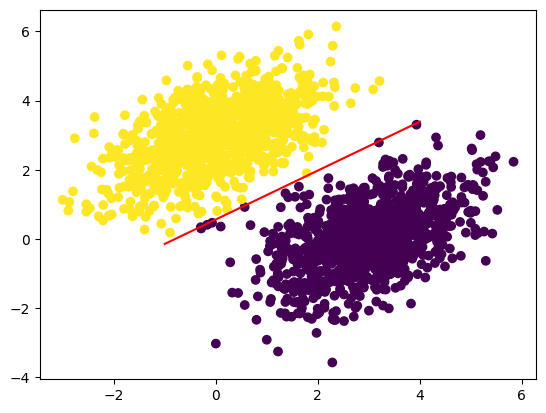

In [ ]:
predictions = model(inputs)
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)